<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br/>
<h1>Management Report</h1>
<p>Survey Data - Unsupervised Analysis Project</p>

Submitted by <b>Team 10: Kriti Prakash, Zhilin Lu, Mosiuwa Tshabalala, Elio Beullac, Carlos Andres Restrepo Ayala</b><br/>
Hult International Business School <br/>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<strong> 1.1 OVERVIEW <strong>

We have been hired by Apple to tun an analyze the buying behavior of customers based on the data collected through a survey of 137 observations. This is our analyze, we present to you the following report with our insight and recommendations on better segmenting and understanding the customer behavior to formulate profitable promotional strategies for each segment. 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {if (code_show){ $('div.input').hide(); } else { $('div.input').show();}; code_show = !code_show} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show / Hide Code"></form>''')

In [2]:
# The Survey Data - Cohort 3 & Team 10 - Hult MsBA 2021 Class
# Unsupervised learning model
# Assumption: The data delivered by marketing team was collected and stored correctly  
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # also <from matplotlib import pyplot as plt>
import seaborn as sns
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

In [3]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()
    
    
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

In [4]:
# Reading the final dataset

# initial preparing the dataframe

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# reading the dataframe for regression
file   ='datasets./survey_data.xlsx'
survey = pd.read_excel(io = file)

<strong> 1.2 FEATURE ENGINEERING <strong>

In [5]:
#Complie a dictionary to replace the column name

#simplefied column name     : original column name 
column_name_dictionary = {
 'SurveyID'                 : 'surveyID',
 'Party_Life'               : 'Am the life of the party',
 'Ignore_Others'            : 'Feel little concern for others',
 'Well_Prepared'            : 'Am always prepared',
 'Handle_Stress_Easily'     : 'Get stressed out easily',
 'Rich_Vocabulary'          : 'Have a rich vocabulary',
 'Not_Talkative'            : "Don't talk a lot",
 'People_Cared'             : 'Am interested in people',
 'Territory_Awareness'      : 'Leave my belongings around',
 'Relaxed'                  : 'Am relaxed most of the time',
 'Complexity'               : 'Have difficulty understanding abstract ideas',
 'Social'                   : 'Feel comfortable around people',
 'Insult'                   : 'Insult people',
 'Detail_Oriented'          : 'Pay attention to details',
 'Worried'                  : 'Worry about things',
 'Vivid_Imagination'        : 'Have a vivid imagination',
 'Being_Behind'             : 'Keep in the background',
 'Compassionate'            : "Sympathize with others' feelings",
 'Messed_Up'                : 'Make a mess of things',
  'Seldom_Depressed'        : 'Seldom feel blue',
 'Non_abstract_Oriented'    : 'Am not interested in abstract ideas',
 'Conversation_Starter'     : 'Start conversations',
 'Egocentric'               : "Am not interested in other people's problems",
 'Act_Now'                  : 'Get chores done right away',
 'Easily_Disturbed'         : 'Am easily disturbed',
 'Innovative'               : 'Have excellent ideas',
 'Talk_Less'                : 'Have little to say',
 'Soft_Hearted'             : 'Have a soft heart',
 'Forget_to_return'         : 'Often forget to put things back in their proper place',
 'Easily_Upset'             : 'Get upset easily',
 'Lack_of_Imagination'      : 'Do not have a good imagination',
 'Party_Talkative'          : 'Talk to a lot of different people at parties',
 'Interested_in_Others'     : 'Am not really interested in others',
 'Ordered'                  : 'Like order',
 'Sensitive'                : 'Change my mood a lot',
 'Quickly_Understand'       : 'Am quick to understand things',
 'Unfocused'                : "Don't like to draw attention to myself",
 'Serving_Others'           : 'Take time out for others',
 'Shirk_Duties'             : 'Shirk my duties',
 'Emotion_Unstabled'        : 'Have frequent mood swings',
 'Difficult_Words'          : 'Use difficult words',
 'Accept_Attention'         : "Don't mind being the center of attention",
 'Empathy'                  : "Feel others' emotions",
 'Scheduled'                : 'Follow a schedule',
 'Easily_Irritated'         : 'Get irritated easily',
 'Think_Deeply'             : 'Spend time reflecting on things',
 'Quiet_around_Strangers'   : 'Am quiet around strangers',
 'Reliable'                 : 'Make people feel at ease',
 'Passion_on_Work'          : 'Am exacting in my work',
 'Often_Depressed'          : 'Often feel blue',
 'Full_of_Ideas'            : 'Am full of ideas',
 'Beyond_Surface'           : 'See underlying patterns in complex situations',
 'Stubborn'                 : "Don't  generate ideas that are new and different",
 'Show_Self_Awareness'      : 'Demonstrate an awareness of personal strengths and limitations',
 'Show_Growth_Mindset'      : 'Display a growth mindset',
 'Respond_Effectively'      : 'Respond effectively to multiple priorities',
 'Blind_Action'             : "Take initiative even when circumstances, objectives, or rules aren't clear",
 'Prefer_Open_Discussion'   : 'Encourage direct and open discussions',
 'Respond_Effectively_1'    : 'Respond effectively to multiple priorities.1',
 'Blind_Action_1'           : "Take initiative even when circumstances, objectives, or rules aren't clear.1",
 'Prefer_Open_Discussion_1' : 'Encourage direct and open discussions.1',
 'Good_Listener'            : 'Listen carefully to others',
 'Unconvincing_Ideas'       : "Don't persuasively sell a vision or idea",
 'Establish_Cooperation'    : 'Build cooperative relationships',
 'Diverse_Cultural'         : 'Work well with people from diverse cultural backgrounds',
 'Effectively_Negotiate'    : 'Effectively negotiate interests, resources, and roles',
 'Lack_of_Team_Appeal'      : "Can't rally people on the team around a common goal",
 'Good_Planner'             : 'Translate ideas into plans that are organized and realistic',
 'Resolve_Conflicts'        : 'Resolve conflicts constructively',
 'Feedback_Oriented'        : 'Seek and use feedback from teammates',
 'Team_Coaching'            : 'Coach teammates for performance and growth',
 'Result_Oriented'          : 'Drive for results',
 'Current_Laptop'           : 'What laptop do you currently have?',
 'Future_Laptop'            : 'What laptop would you buy in next assuming if all laptops cost the same?',
 'Program'                  : 'What program are you in?',
 'Age'                      : 'What is your age?',
 'Gender'                   : 'Gender',
 'Nationality'              : 'What is your nationality? ',
 'Ethnicity'                : 'What is your ethnicity?',
}

#function get the key of the given value
def get_keys(d, value):
    return [k for k,v in d.items() if v == value]

# change the column name according to dictionary
survey.columns =  list(column_name_dictionary.keys())

In [6]:
# Fixing nationalities
survey['Nationality'] = survey['Nationality'].replace('Brazil', 'Brazilian')
survey['Nationality'] = survey['Nationality'].replace('Colombia', 'Colombian')
survey['Nationality'] = survey['Nationality'].replace('Congolese (DR CONGO)', 'Congolese')
survey['Nationality'] = survey['Nationality'].replace('Czech Republic', 'Czech')
survey['Nationality'] = survey['Nationality'].replace('Ecuador', 'Ecuadorian')
survey['Nationality'] = survey['Nationality'].replace('Germany', 'German')
survey['Nationality'] = survey['Nationality'].replace('INDIAN', 'Indian')
survey['Nationality'] = survey['Nationality'].replace('Indonesia', 'Indonesian')
survey['Nationality'] = survey['Nationality'].replace('Nigeria', 'Nigerian')
survey['Nationality'] = survey['Nationality'].replace('Peru', 'Peruvian')
survey['Nationality'] = survey['Nationality'].replace('Russia', 'Russian')
survey['Nationality'] = survey['Nationality'].replace('Spain', 'Spanish')
survey['Nationality'] = survey['Nationality'].replace('Brazil', 'Brazilian')
survey['Nationality'] = survey['Nationality'].replace('Canada', 'Canadian')
survey['Nationality'] = survey['Nationality'].replace('canadian', 'Canadian')
survey['Nationality'] = survey['Nationality'].replace('CHINA', 'Chinese')
survey['Nationality'] = survey['Nationality'].replace('china', 'Chinese')
survey['Nationality'] = survey['Nationality'].replace('chinese', 'Chinese')
survey['Nationality'] = survey['Nationality'].replace('colombian', 'Colombian')
survey['Nationality'] = survey['Nationality'].replace('ecuador', 'Ecuadorian')
survey['Nationality'] = survey['Nationality'].replace('indian', 'Indian')
survey['Nationality'] = survey['Nationality'].replace('indian.', 'Indian')
survey['Nationality'] = survey['Nationality'].replace('italian', 'Italian')
survey['Nationality'] = survey['Nationality'].replace('mexican', 'Mexican')
survey['Nationality'] = survey['Nationality'].replace('nigerian', 'Nigerian')
survey['Nationality'] = survey['Nationality'].replace('China', 'Chinese')
survey['Nationality'] = survey['Nationality'].replace('USA', 'American')
survey['Nationality'] = survey['Nationality'].replace('Dominican ', 'Dominican')
 

In [7]:
# counting observations for categorical values
# Current laptop
# use sort_values(ascending=False). to sort in descending order
#print(f"""Current Laptop is: 
#{survey.loc[:,'Current_Laptop'].value_counts(sort = False).sort_index()}""")

# Next Laptop
#print(f"""
#Next Laptop will be a: 
#{survey.loc[:,'Future_Laptop'].value_counts(sort = False).sort_index()}""")

# Academic Program
#print(f"""
#Academic programa is: 
#{survey.loc[:,'Program'].value_counts(sort = False).sort_index()}""")

# Gender
#print(f"""
#Gender is: 
#{survey.loc[:,'Gender'].value_counts(sort = False).sort_index()}""")

# Nationality
#print(f"""
#Nationality is: 
#{survey.loc[:,'Nationality'].value_counts(sort = False).sort_index()}""")

# Ethnicity
#print(f"""
#Ethinicity is: 
#{survey.loc[:,'Ethnicity'].value_counts(sort = False).sort_index()}""")

In [8]:
# Making Log Transformation for Age
survey['log_Age'] = np.log(survey['Age'])

In [9]:
# Analayze of "paired" variables  for checking non-valid observations

# creating the variable for reverse scales
survey['rev_Compassionate']          = 0
survey['rev_Beyond_Surface']         = 0
survey['rev_Quiet_around_Strangers'] = 0
survey['rev_Lack_of_Imagination']    = 0


# Reversing the values for those variable with Inverse meaning
for index in survey['Compassionate']:
    survey['rev_Compassionate']          = 6 - survey['Compassionate']
for index in survey['Beyond_Surface']:
    survey['rev_Beyond_Surface']         = 6 - survey['Beyond_Surface']
for index in survey['Quiet_around_Strangers']:
    survey['rev_Quiet_around_Strangers'] = 6 - survey['Quiet_around_Strangers']
for index in survey['Lack_of_Imagination']:
    survey['rev_Lack_of_Imagination']    = 6 - survey['Lack_of_Imagination']


# creating the flag for counting possible incongruences
survey['flag_parties']       = abs(survey['Party_Life'] - survey['Party_Talkative'])
survey['flag_stress']        = abs(survey['Handle_Stress_Easily'] - survey['Relaxed'])
survey['flag_irritations']   = abs(survey['Easily_Irritated'] - survey['Easily_Upset'])
survey['flag_feelings']      = abs(survey['Ignore_Others'] - survey['rev_Compassionate'])
survey['flag_problems']      = abs(survey['Egocentric'] - survey['Interested_in_Others'])
survey['flag_Abstraction']   = abs(survey['Complexity'] - survey['rev_Beyond_Surface'])
survey['flag_strangers']     = abs(survey['Accept_Attention'] - survey['rev_Quiet_around_Strangers'])
survey['flag_imagination']   = abs(survey['Vivid_Imagination'] - survey['rev_Lack_of_Imagination'])
survey['flag_mess']          = abs(survey['Forget_to_return'] - survey['Messed_Up'])
survey['flag_Open_Discuss']  = abs(survey['Prefer_Open_Discussion']  - survey['Prefer_Open_Discussion_1'])
survey['flag_Respond_Eff']   = abs(survey['Respond_Effectively']  - survey['Respond_Effectively_1'])
survey['flag_Blind_Action']  = abs(survey['Blind_Action']  - survey['Blind_Action_1'])


# calculating a general flag
survey['general_flag'] = (survey['flag_parties'] +
                         survey['flag_stress'] +
                         survey['flag_irritations'] +
                         survey['flag_feelings'] +
                         survey['flag_problems'] +
                         survey['flag_Abstraction'] +
                         survey['flag_strangers'] +
                         survey['flag_imagination'] +
                         survey['flag_mess'] +
                         survey['flag_Open_Discuss'] + 
                         survey['flag_Respond_Eff'] +
                         survey['flag_Blind_Action']) 

# Calculating interquartile range for general flag
q3 = survey['general_flag'].quantile(0.75)
q1 = survey['general_flag'].quantile(0.25)
IQR = q3 - q1

# Calculating compulsory limits of Interquartile Range(IQR) Method
Upper_compulsory_limit = round(q3 + 1.5*IQR, 2)

# Cheking observations that has a general flag as an outlier
print("Index of obs to drop")
survey['general_flag'][survey['general_flag'] > Upper_compulsory_limit]

Index of obs to drop


56    19
77    20
93    19
Name: general_flag, dtype: int64

In [10]:
#Dropping the observations with non-trusted answers
survey = survey.drop(survey.index[56])
survey = survey.drop(survey.index[77])
survey = survey.drop(survey.index[93])

In [11]:
# saving the checked dataframe into a new file

# converting model_performance into a DataFrame
survey = pd.DataFrame(survey)

# sending model results to Excel
survey.to_excel('datasets./checked_survey.xlsx',
                           index = False)

In [12]:
# reading and preparing a new dataframe with the checked survey for PCA

# reading the dataframe for regression
file ='datasets./checked_survey.xlsx'
df_survey = pd.read_excel(io = file)

# dropping demographic, flags and non-required features
df_survey = df_survey.drop(['SurveyID', 'log_Age', 'Gender','Nationality',
                            'Ethnicity', 'Current_Laptop',
                            'Future_Laptop', 'Program',
                            'rev_Compassionate', 'rev_Beyond_Surface',
                            'rev_Quiet_around_Strangers',
                            'rev_Lack_of_Imagination', 'flag_parties',
                            'flag_stress', 'flag_irritations',
                            'flag_feelings', 'flag_problems',
                            'flag_Abstraction', 'flag_strangers',
                            'flag_imagination', 'flag_mess', 'flag_Open_Discuss',
                            'flag_Respond_Eff', 'flag_Blind_Action', 
                            'Respond_Effectively_1', 'Blind_Action_1',
                            'Prefer_Open_Discussion_1','general_flag',],
                            axis = 1)


In [13]:
# creating a dictionary for big five personality test

five_per_dictionary = {
    'Extroversion':
         ['Party_Life', 'Not_Talkative', 'Social', 'Being_Behind', 'Conversation_Starter', 
          'Talk_Less', 'Party_Talkative', 'Unfocused', 'Accept_Attention', 
          'Quiet_around_Strangers'],
    
    'Agreeableness':
        ['Ignore_Others', 'People_Cared', 'Insult', 'Compassionate', 'Egocentric', 
         'Soft_Hearted', 'Interested_in_Others',
        'Serving_Others', 'Empathy', 'Reliable'],

    'Conscientiousness':
        ['Well_Prepared', 'Territory_Awareness', 'Detail_Oriented', 'Messed_Up', 'Act_Now', 
        'Forget_to_return', 'Ordered', 'Shirk_Duties', 'Scheduled', 'Passion_on_Work'],
    
    'Neuroticism':
        ['Handle_Stress_Easily', 'Relaxed', 'Worried', 'Seldom_Depressed', 'Easily_Disturbed',
        'Easily_Upset', 'Sensitive', 'Emotion_Unstabled', 'Easily_Irritated', 'Often_Depressed'],
    
    'Openness':
        ['Rich_Vocabulary', 'Complexity', 'Vivid_Imagination', 'Non_abstract_Oriented', 'Innovative',
        'Lack_of_Imagination', 'Quickly_Understand', 'Difficult_Words', 'Think_Deeply', 'Full_of_Ideas']
}

In [14]:
#Calculating the Big 5 personalities score from the questions
df_survey['Extroversion'] = 20 + (df_survey['Party_Life'] - df_survey['Not_Talkative'] + df_survey['Social'] -
                            df_survey['Being_Behind'] + df_survey['Conversation_Starter'] -
                            df_survey['Talk_Less'] + df_survey['Party_Talkative'] -
                            df_survey['Unfocused'] + df_survey['Accept_Attention'] -
                            df_survey['Quiet_around_Strangers'])

df_survey['Agreeableness'] = 14 - (df_survey['Ignore_Others'] + df_survey['People_Cared'] - df_survey['Insult'] + 
                            df_survey['Compassionate'] - df_survey['Egocentric'] + df_survey['Soft_Hearted'] - 
                            df_survey['Interested_in_Others'] + df_survey['Serving_Others'] + df_survey['Empathy'] + 
                            df_survey['Reliable'])

df_survey['Conscientiousness'] = 14 + (df_survey['Well_Prepared'] - df_survey['Territory_Awareness'] + 
                                df_survey['Detail_Oriented'] - df_survey['Messed_Up'] + df_survey['Act_Now'] - 
                                df_survey['Forget_to_return'] + df_survey['Ordered'] - df_survey['Shirk_Duties'] + 
                                df_survey['Scheduled'] + df_survey['Passion_on_Work'])

df_survey['Neuroticism'] = 38 - (df_survey['Handle_Stress_Easily'] + df_survey['Relaxed'] - df_survey['Worried'] + 
                            df_survey['Seldom_Depressed'] - df_survey['Easily_Disturbed'] - df_survey['Easily_Upset'] - 
                            df_survey['Sensitive'] - df_survey['Emotion_Unstabled'] - df_survey['Easily_Irritated'] - 
                            df_survey['Often_Depressed'])

df_survey['Openness'] = 8 + (df_survey['Rich_Vocabulary'] - df_survey['Complexity'] + df_survey['Vivid_Imagination'] - 
                        df_survey['Non_abstract_Oriented'] + df_survey['Innovative'] - df_survey['Lack_of_Imagination'] + 
                        df_survey['Quickly_Understand'] + df_survey['Difficult_Words'] + df_survey['Think_Deeply'] + 
                        df_survey['Full_of_Ideas'])

In [15]:
#Calculating the Hult DNA score from the questions 

#accoring to the HULT leadship model
HULT_DNA_dictionary = {            

    #thinking
    'Thinking_P':
                ['Show_Self_Awareness',     #highly-developed
                'Show_Growth_Mindset',      #Developed
                'Beyond_Surface',           #highly-developed
                 'Good_Planner' ],     #Developed
    
    'Thinking_N':
                ["Stubborn",      #Under-developed
                "Blind_Action",  #Under-developed
                ],
    
    #communicating
    'Communicating_P':
                ['Good_Listener', #Developed
                 'Effectively_Negotiate', #Developed
                 'Respond_Effectively', #Under-developed
                 'Result_Oriented'], 
    
    'Communicating_N':
                ["Unconvincing_Ideas"], #Under-developed
    
    #Team building
    'Team_Building_P':
                ['Diverse_Cultural', #highly-developed
                'Resolve_Conflicts', #developed
                'Prefer_Open_Discussion', #developed
                'Feedback_Oriented', #highly-developed
                'Establish_Cooperation', #developed
                'Team_Coaching'], #highly-developed
    
    'Team_Building_N':
                ["Lack_of_Team_Appeal"]   #Under-developed
    
 
}

In [16]:
#initiate column
for col in list(HULT_DNA_dictionary.keys()):
    df_survey[col] = 0 
    #check the col process

    
    #calculate the value by sum/average method
    for sub_col in HULT_DNA_dictionary[col] : 
        if sub_col == None:
            df_survey[col] += 0
        else:
            #sum function
            df_survey[col] += df_survey[sub_col]
            
            #check the subcol process

            
#merge column
df_survey['HULT_Thinking']      = df_survey['Thinking_P']- df_survey['Thinking_N']

df_survey['HULT_Communicating'] = df_survey['Communicating_P']- df_survey['Communicating_N']

df_survey['HULT_Team_Building'] = df_survey['Team_Building_P']-df_survey['Team_Building_N']

#list
HULT_DNA_list = ['HULT_Thinking',
            'HULT_Communicating',
            'HULT_Team_Building']

In [17]:
#Preparing the dataset for PCA analysis
 
df_survey = df_survey.drop(['Party_Life', 'Ignore_Others', 'Well_Prepared', 'Handle_Stress_Easily', 'Rich_Vocabulary', 
                            'Not_Talkative', 'People_Cared', 'Territory_Awareness', 'Relaxed', 'Complexity', 'Social', 
                            'Insult', 'Detail_Oriented', 'Worried', 'Vivid_Imagination', 'Being_Behind', 'Compassionate', 'Messed_Up', 'Seldom_Depressed', 'Non_abstract_Oriented', 'Conversation_Starter', 'Egocentric', 'Act_Now', 'Easily_Disturbed', 'Innovative', 'Talk_Less', 'Soft_Hearted', 'Forget_to_return', 'Easily_Upset', 'Lack_of_Imagination', 'Party_Talkative', 'Interested_in_Others', 'Ordered', 'Sensitive', 'Quickly_Understand', 'Unfocused', 'Serving_Others', 'Shirk_Duties', 'Emotion_Unstabled', 'Difficult_Words', 'Accept_Attention', 'Empathy', 'Scheduled', 'Easily_Irritated', 'Think_Deeply', 'Quiet_around_Strangers', 'Reliable', 'Passion_on_Work', 'Often_Depressed', 'Full_of_Ideas', 'Beyond_Surface', 'Stubborn', 'Show_Self_Awareness', 'Show_Growth_Mindset', 'Respond_Effectively', 'Blind_Action',
                            'Prefer_Open_Discussion', 'Good_Listener', 'Unconvincing_Ideas', 'Establish_Cooperation', 
                            'Diverse_Cultural', 'Effectively_Negotiate', 'Lack_of_Team_Appeal', 'Good_Planner', 
                            'Resolve_Conflicts', 'Feedback_Oriented', 'Team_Coaching', 'Result_Oriented', 'Age',
                            'Thinking_P', 'Thinking_N', 'Communicating_P', 'Communicating_N', 'Team_Building_P',
                            'Team_Building_N'],
                            axis = 1)

In [18]:
# Scaling the variables

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the data
scaler.fit(df_survey)

# TRANSFORMING our data after fit
X_scaled = scaler.transform(df_survey)

# converting scaled data into a DataFrame
df_survey_scaled = pd.DataFrame(X_scaled)

# reattaching column names
df_survey_scaled.columns = df_survey.columns

# checking pre- and post-scaling variance
#print(pd.np.var(df_survey), '\n\n')
#print(pd.np.var(df_survey_scaled))

<strong>1.3 PRINCIPAL COMPONENT ANALYSIS <strong>

In [19]:
# Principal Component Analysis

# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
df_survey_pca = pca.fit_transform(df_survey_scaled)


# comparing dimensions of each DataFrame
#print("Original shape:", df_survey_scaled.shape)
#print("PCA shape     :",  df_survey_pca.shape)

In [20]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.round(3))

#printing the sum of 5 features
print(pca.explained_variance_ratio_[:5].sum().round(2))

[0.426 0.128 0.121 0.099 0.08  0.06  0.056 0.03 ]
0.85


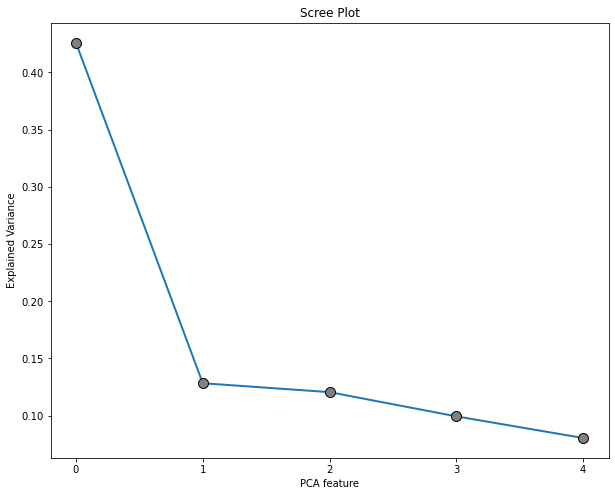

In [21]:
# Components chosen

# INSTANTIATING a new model using the first three principal components
pca_7 = PCA(n_components = 5,
            random_state = 802)


# FITTING and TRANSFORMING the purchases_scaled
survey_pca_7 = pca_7.fit_transform(df_survey_scaled)


#Calling the scree_plot function
scree_plot(pca_object = pca_7)

We are choosing 5 components as these components explained roughly 85% of the spread in the data points (observations). 

In [22]:
# transposing pca components
factor_loadings_df = pd.DataFrame(pd.np.transpose(pca_7.components_))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(df_survey_scaled.columns)


# checking the result
pd.DataFrame(factor_loadings_df)
check_factors = pd.DataFrame(factor_loadings_df)

# sending model results to Excel
check_factors.to_excel('./survey_factor_full.xlsx',
                           index = False)

C:\Users\USER\AppData\Local\Temp/ipykernel_2188/1442910694.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  factor_loadings_df = pd.DataFrame(pd.np.transpose(pca_7.components_))


In [23]:
# checking the varirables more related C1
check_factors[0].sort_values(ascending=True).head(n=10)

Agreeableness        -0.311133
Neuroticism          -0.155085
Extroversion          0.216907
Conscientiousness     0.343035
Openness              0.363819
HULT_Thinking         0.393804
HULT_Team_Building    0.450634
HULT_Communicating    0.473187
Name: 0, dtype: float64

In [24]:
# checking the varirables more related C2
check_factors[1].sort_values(ascending=True).head(n=10)

Conscientiousness    -0.460398
Agreeableness        -0.269269
HULT_Thinking        -0.112089
HULT_Communicating    0.070675
Openness              0.126244
HULT_Team_Building    0.129590
Extroversion          0.413058
Neuroticism           0.703293
Name: 1, dtype: float64

In [25]:
# checking the varirables more related C3
#check_factors[2].sort_values(ascending=True).head(n=10)

In [26]:
# checking the varirables more related C4
#check_factors[3].sort_values(ascending=True).head(n=10)

In [27]:
# checking the varirables more related C5
#check_factors[4].sort_values(ascending=True).head(n=10)

In [28]:
# naming each principal component
factor_loadings_df.columns = ['Follower',                 
                              'Founder',         
                              'Commercial', 
                              'Manager',            
                              'CFO']         


# checking the result
factor_loadings_df.round(2)

,Follower,Founder,Commercial,Manager,CFO
Extroversion,0.22,0.41,-0.70,-0.36,-0.28
Agreeableness,-0.31,-0.27,0.14,-0.73,-0.37
Conscientiousness,0.34,-0.46,0.17,0.09,-0.58
Neuroticism,-0.16,0.70,0.57,0.01,-0.35
Openness,0.36,0.13,0.22,-0.49,0.45
HULT_Thinking,0.39,-0.11,0.29,-0.25,0.25
HULT_Communicating,0.47,0.07,0.05,0.06,-0.21
HULT_Team_Building,0.45,0.13,0.02,0.15,-0.16


In [29]:
# converting into a DataFrame 
survey_pca = pd.DataFrame(survey_pca_7)


# renaming columns
survey_pca.columns = factor_loadings_df.columns


# checking results
#survey_pca

In [30]:
# Re-scaling the components for clustering

# checking variance amongst clusters
np.var(survey_pca)

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(survey_pca)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(survey_pca)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Follower',                 
                      'Founder',         
                      'Commercial', 
                      'Manager',            
                      'CFO'] 


# checking pre- and post-scaling variance
print(pd.np.var(survey_pca), '\n\n')
print(pd.np.var(pca_scaled))

Follower      3.408385
Founder       1.026851
Commercial    0.964452
Manager       0.795071
CFO           0.643539
dtype: float64 


Follower      1.0
Founder       1.0
Commercial    1.0
Manager       1.0
CFO           1.0
dtype: float64


C:\Users\USER\AppData\Local\Temp/ipykernel_2188/2875836299.py:31: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  print(pd.np.var(survey_pca), '\n\n')
C:\Users\USER\AppData\Local\Temp/ipykernel_2188/2875836299.py:32: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  print(pd.np.var(pca_scaled))


<strong> 1.4 CLUSTERING <strong>

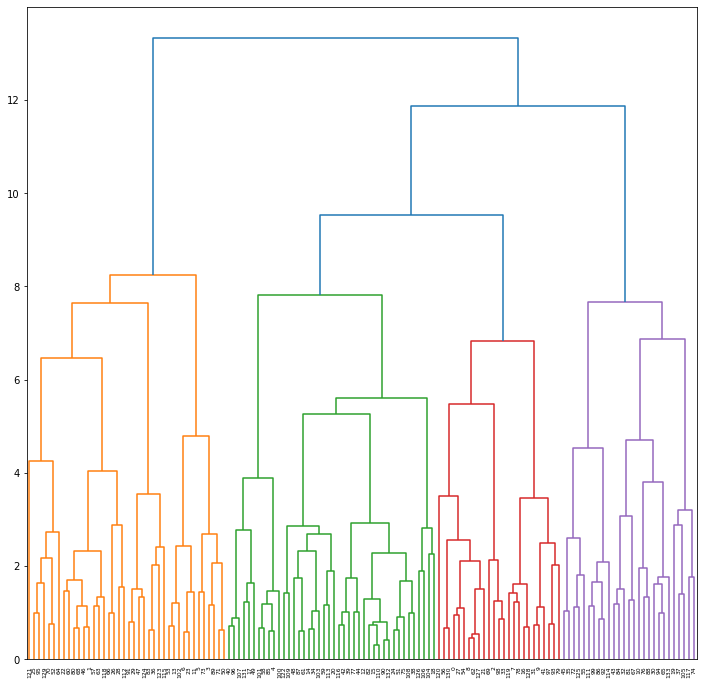

In [31]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./standard_hierarchical_clust_ward.png')
plt.show()

This chart shows us in how many groups we can cluster our data based on the PCA analysis. 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


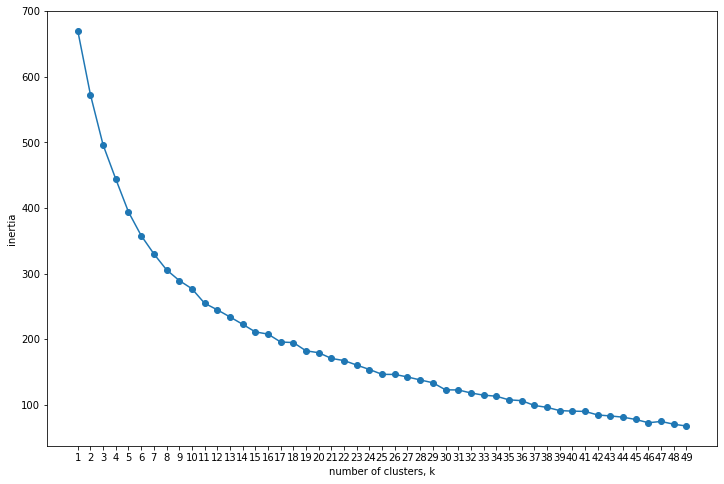

In [32]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled)

Based on this graph we have decided to choose 5 clusters as the difference of explained ratio doesn't decrease as much between 5 and 6 as it did before.  

In [33]:
# INSTANTIATING a k-Means object with clusters
survey_k_pca = KMeans(n_clusters   = 5,
                         random_state = 219)


# fitting the object to the data
survey_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
survey_kmeans_pca = pd.DataFrame({'Cluster': survey_k_pca.labels_})


# checking the results
print(f"""Number of cluster with sample size \n{survey_kmeans_pca.iloc[: , 0].value_counts()}""")

Number of cluster with sample size 
1    38
3    32
4    24
0    20
2    20
Name: Cluster, dtype: int64


In [34]:
# storing cluster centers
centroids_pca = survey_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Follower',                 
                            'Founder',         
                            'Commercial', 
                            'Manager',            
                            'CFO'] 

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Follower,Founder,Commercial,Manager,CFO
0,-0.13,0.19,-0.06,-1.60,-0.38
1,0.81,0.11,-0.72,0.11,0.28
2,-0.13,1.19,0.84,0.78,-0.03
3,-0.94,-0.40,-0.47,0.32,-0.66
4,0.18,-0.80,1.13,0.09,0.77


In [35]:
# Concatenating with the dataframe

# concatenating cluster survey with principal components
clst_pca_df = pd.concat([survey_kmeans_pca,
                         survey_pca],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey.loc[ : , ['Gender','Nationality',
                                                    'Ethnicity', 'Current_Laptop',
                                                    'Future_Laptop', 'Program', 'Age' 
                                ]],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Gender','Nationality',
                              'Ethnicity', 'Current_Laptop',
                              'Future_Laptop', 'Program', 'Age',
                              'Cluster', 'Follower','Founder',         
                              'Commercial', 'Manager', 'CFO'
                             ]


# checking the results
#print(final_pca_clust_df.head(n = 5))

data_df = pd.DataFrame(final_pca_clust_df)
#data_df.head(10)

<strong> 1.5 INSIGHTS AND RECOMMENDATIONS <strong>

In [36]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 95
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          134 non-null    object 
 1   Nationality     134 non-null    object 
 2   Ethnicity       134 non-null    object 
 3   Current_Laptop  134 non-null    object 
 4   Future_Laptop   134 non-null    object 
 5   Program         134 non-null    object 
 6   Age             134 non-null    float64
 7   Cluster         134 non-null    float64
 8   Follower        134 non-null    float64
 9   Founder         134 non-null    float64
 10  Commercial      134 non-null    float64
 11  Manager         134 non-null    float64
 12  CFO             134 non-null    float64
dtypes: float64(7), object(6)
memory usage: 15.0+ KB


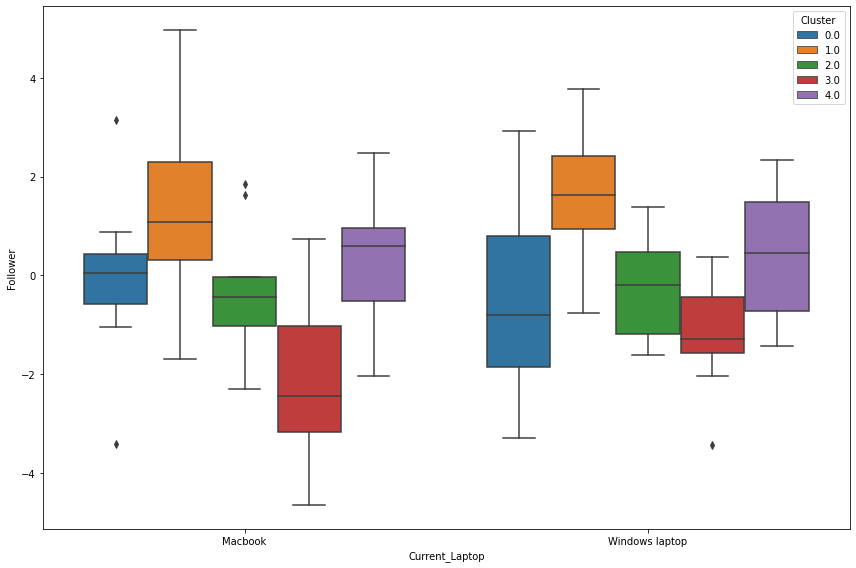

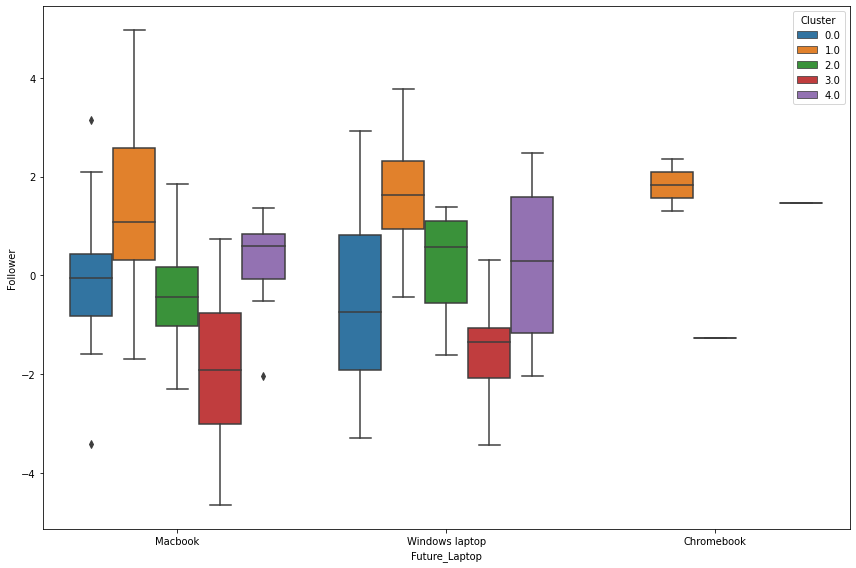

In [37]:
########################
# Current Computer
########################

# Follower 
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_Laptop',
            y = 'Follower',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

########################
# Future Computer
########################

# Follower
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Future_Laptop',
            y = 'Follower',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

We see a difference in the medians of the boxplots oranges. For Macbook users, the median is highly negative while for Windows users it is closer to 0. The segment of people who strongly do not have the follower trait in orange cluster have grown although these are more likely to purchase a Windows pc. A deeper analysis of this trend will help in the promotional strategy. 

Secondly, we can see that the medians for boxplots Green and Red Cluster are slightly positive for Macbook but their are higher for Windows. 


For the cluster 3 (Red) even though we see a larger base of users for Macbook than Windows, the lower median highlights that the users cannot or are not willing to pay a lot of money for Macbook. 

For the people in cluster 0 (Blue) we see a significant change in buying behaviour which indicates that this particular has aligned their identity with macbooks more than windows.  

In the Future Laptop graph, we see that boxplots red and green stand out for Macbook, with a small positive median. But this trend is more perceptible for Windows Laptop. 

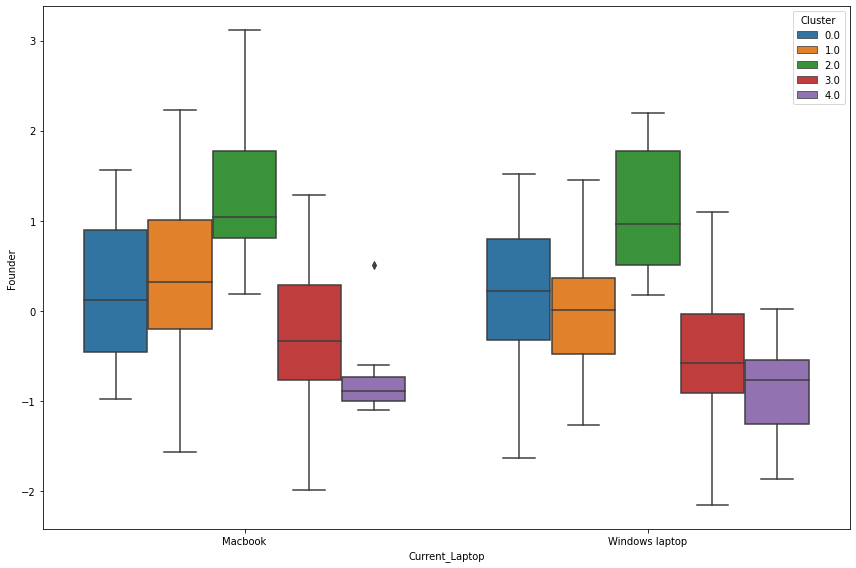

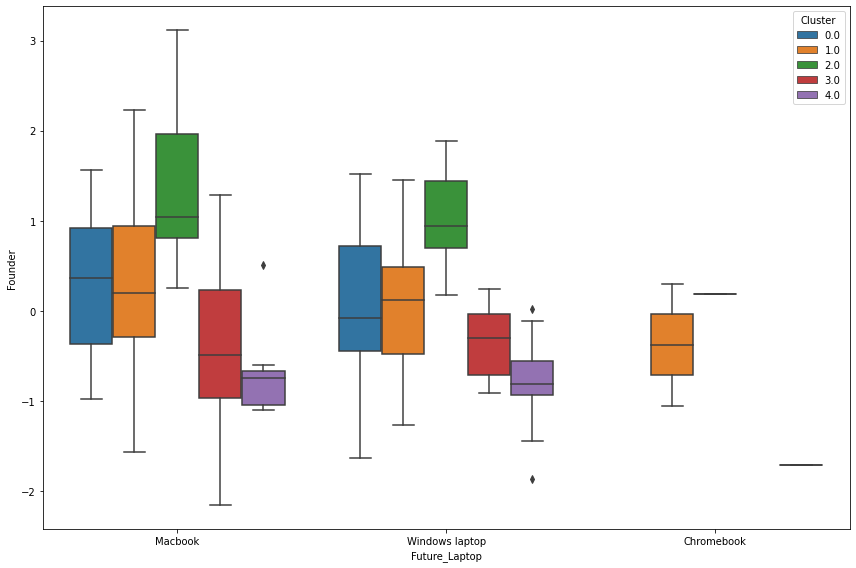

In [38]:
########################
# Current Computer
########################

# Founder
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_Laptop',
            y = 'Founder',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

########################
# Future Computer
########################

# Founder
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Future_Laptop',
            y = 'Founder',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

In the current laptop graph:
Interestingly, boxplots blue, red and purple are positive for Macbook users. 
Furthermore, we see that the blue boxplots have a higher median for Windows users. Implying that the cluster 0 is more sensible to a promotion targeting a 'Founder' audience for Windows computer than Macbook. 

Also, we see that the range of boxplots Red and Purple goes from the negatives to the positives. Thus, we understand that customers from the clusters 3 and 4 are mostly "Founder" but everytime.


In the future laptop graph: 
Comparing the boxplots medians, we can see that customers willing to buy Macbook are more sensible to a promotion framed for 'Founder' individual than customers willing to buy Windows. However, the green boxplot (cluster2) has the reverse trend. 

Similarly to Current Laptop, the range of the boxplots goes from the negatives to the positives. Thus, it is unclear what will be the exact outcome of promoting Macbook using a "Founder" targeted communication. 

The fact that the Founder demographic has a generally positive relationship with Macbooks is aligned with the Brand message that Apple inspires innovation and creativity.  We see a change in the perception of the orange cluster 1 in the future laptop meaning we can anticipate more successful results for segmenting this cluster.  



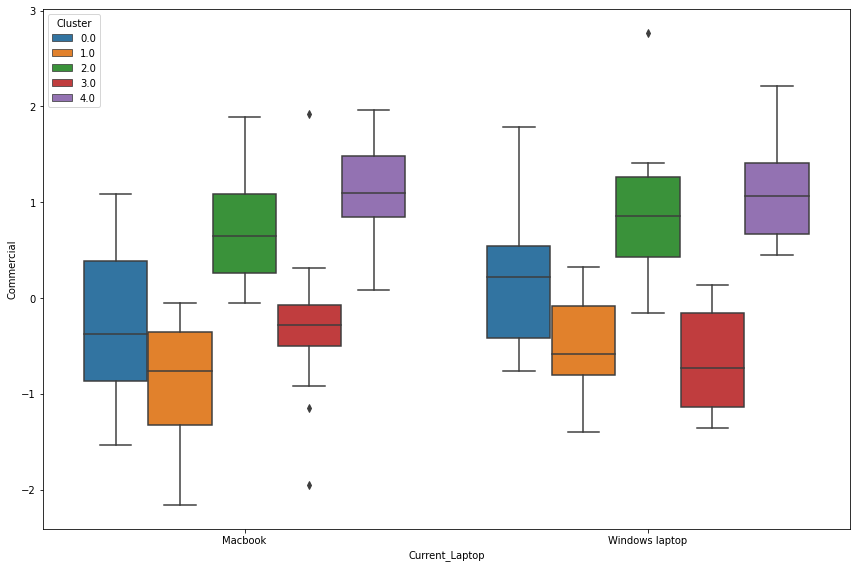

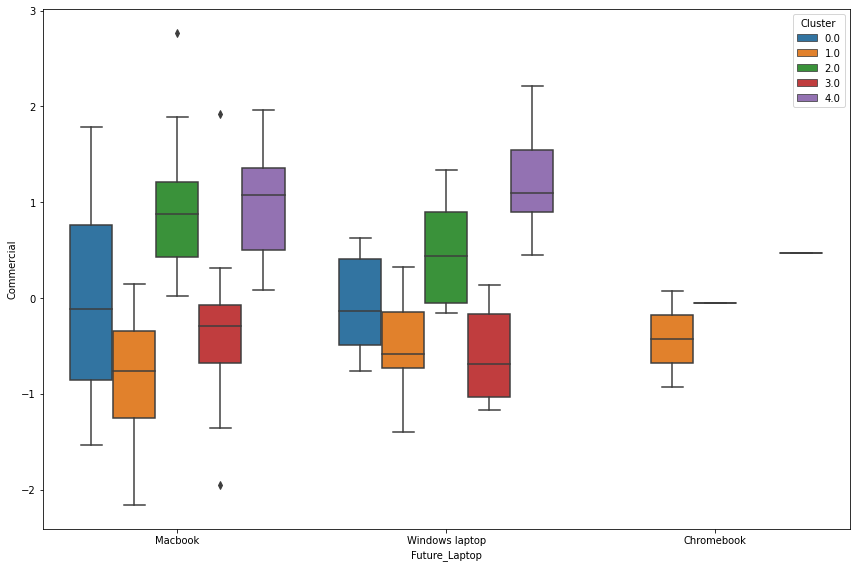

In [39]:
########################
# Current Computer
########################

# Commercial
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_Laptop',
            y = 'Commercial',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

########################
# Future Computer
########################

# Commercial
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Future_Laptop',
            y = 'Commercial',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

In the Current laptop graph : 
We can see that the Cluster 4 (Purple) is standing out for Macbook users. This means the cluster 4 has the "Commercial" trait and will be sensible to define a promotional strategy targeting those set of users as the median is slightly higher for Windows users. 

Also, we see that the Cluster 3 (Red) scores negatively, implying that a campaign targeting "commercial" clients is not a good idea here. 

Finally, when comparing the medians of all boxplots we can see that they are higher for Windows users than Macbook users. Windows users are in general more "Commercial" than Macbook users.

In the Future laptop graph :
We see the same trends on this graph as before, with one difference : the range of the purple boxplot for macbook users increased significantly in the positives values. Also the observed difference for the medians of this cluster between Macbook and Windows has reduced.  This implies that there is an opportunity to reach more people in this cluster.


In comparison to the Windows users the median for Macbook users for Clusters 0, 1 and 2 are negative in the Current Laptop Graph, we see a positive trend in the Windows users.

While for the Future Laptop, Cluster 0 has increase a bit for Mackbook and reduced for Windows. The range for Cluster 1 and 2 has increased for Windoes. This graph shows that Mackbook is anticipated to lose a part of its market to Windows which is good insight to look into while making strategy for promotion in order to minimize the effect of this transition. 


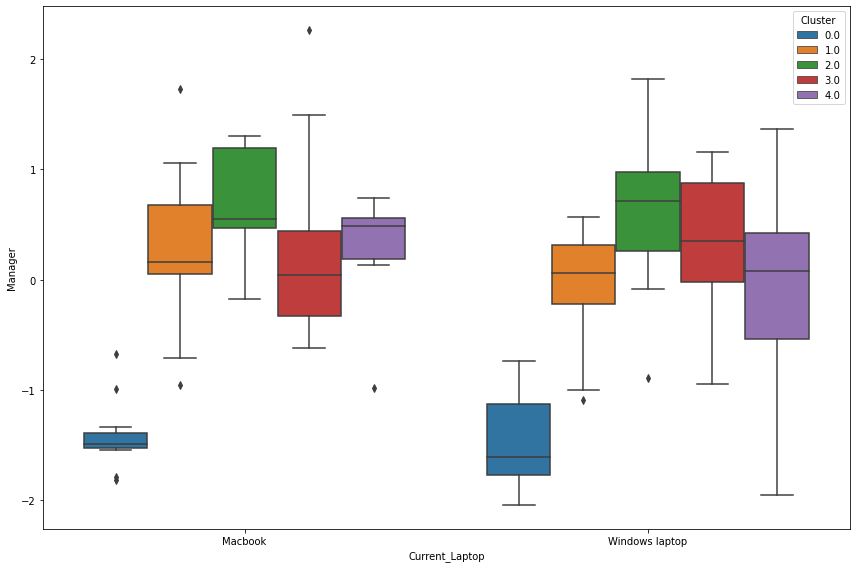

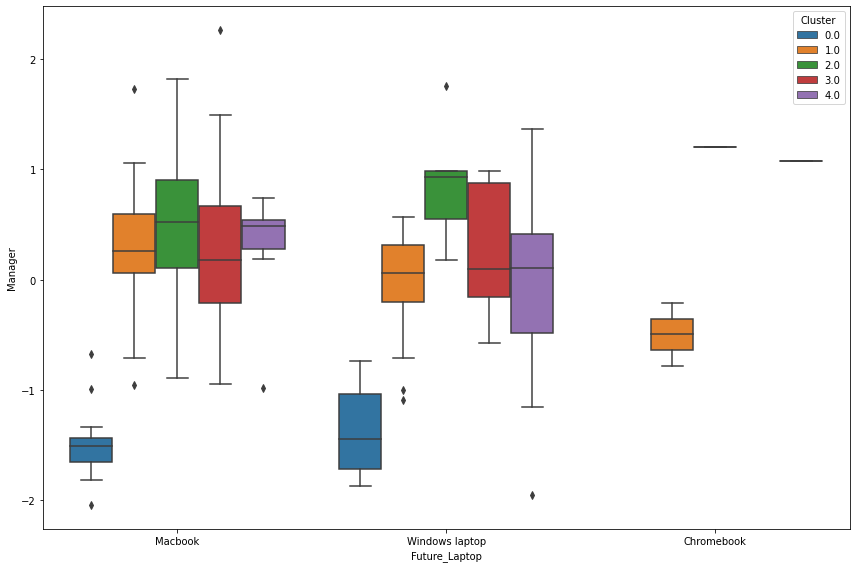

In [40]:
########################
# Current Computer
########################

# Manager
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_Laptop',
            y = 'Manager',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

########################
# Future Laptop
########################

# Manager
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Future_Laptop',
            y = 'Manager',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

The negative values for Cluster 0 for both graphs imply that the users are insensible to a promotion targeted for customers having a Manager trait. 

For Managers to convert to Apple it is important to influence the people's purchasing decisions. The trait of users in this group includes loyalty to whatever they commit to, and not open to new ideas which also makes them compliant and a loyal segment. If we target to convince the companies this segment work for, to convert from Windows to Macbook, the chances of success is high. Another positive about this segment is that it is fairly stable due to this loyalty and compliance so if we convert any of the clusters (red, green & purple) we are likely to have high chances of repeat purchase values over a sustained period of time.

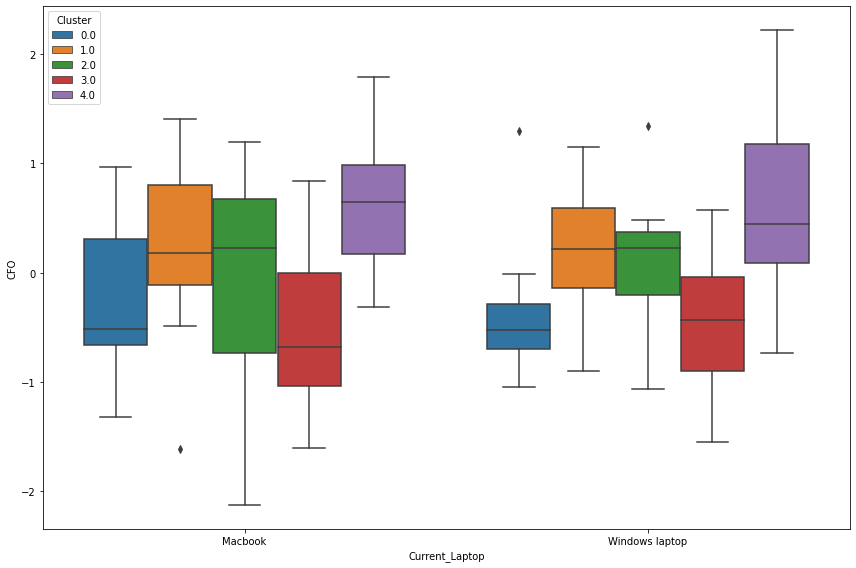

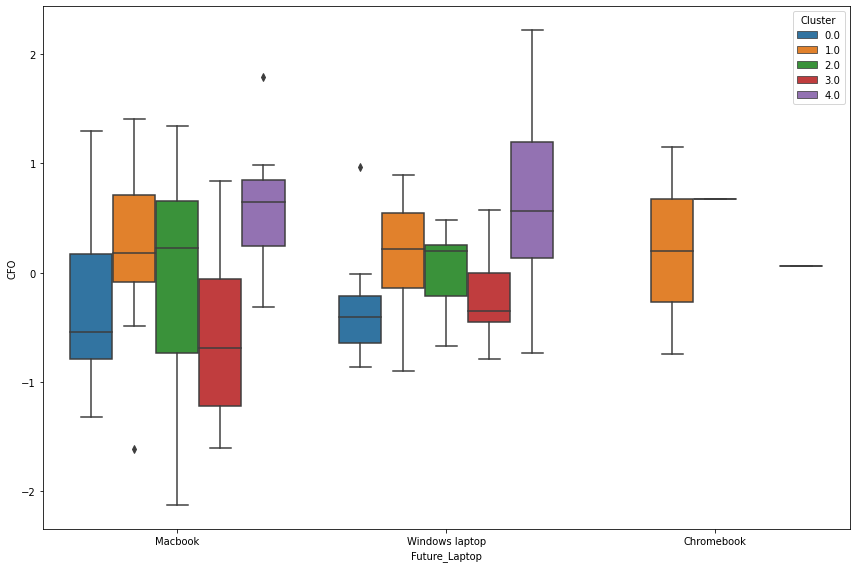

In [41]:
########################
# Current Computer
########################

# CFO
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_Laptop',
            y = 'CFO',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

########################
# Futur Computer
########################

# CFO
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Future_Laptop',
            y = 'CFO',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

The market for CFO's in orange cluster 1 is anticipated to grow for Macbooks, even having a higher median than Windows as indicated by the boxplot.  In terms of the purple cluster we see sustained growth in CFO minded people meaning that there is a potential for improvement in this segment. 

We can anticipate more growth to catch up with the Windows laptops in the red cluster so a targeted campaign for this base would influence buyer behavior to sway more towards Macbooks. 

In conclusion the red and orange cluster are the most likely to succeed. 

<strong> 1.5 CONCLUSION <strong>


Based on the analysis above, we would like to conclude the following : 

1. Cluster 0 [Blue]
- It is more beneficial to target them using a promotion framed for clients sharing the "Founder" trait. 

- However, it is important to avoid addressing this cluster using "Manager" and "CFO" traits.  

2. Cluster 1 [Orange]
- This cluster prefers a "CFO" framed promotion. 

- They are not sensible to a promotion framed for "Follower" trait

3. Cluster 2 [Green]
- Clients from the cluster 2 are sensible to promotion framed for the "Manager" type. 

- But they are insensible to a "Founder"  campaigns

4. Cluster 3 [Red]

- This cluster is much more responsive than the other ones. Indeed they are sensible to a promotion targeting "Follower" and "Founder"  and "Manager" and "CFO"

- However it is important to avoid using "Commercial" framed promotion when communicating to them.

5. Cluster 4 [Purple]
- This cluster seems to be sensible to "Founder", "Commercial" and "Manager" promotions.
